# Bunemann instability in a cold, unmagnetized plasma fluid

In [ ]:
import sys
import matplotlib.pyplot as plt
import numpy as np
from numpy import sqrt

sys.path.append('../../')
import xenon

In [2]:
def test(v0, ax0, ax1, wrmax=None):
    # parameters
    mi = 6
    gamma = 1

    species = np.array([
        # q, m, n0, v0, p0, gamma
        [-1, 1, 1, v0, 0, gamma],
        [+1, mi, 1, 0, 0, gamma],
    ])
    params = dict(
        c=1.,
        epsilon0=1.,
    )
    dr_params = xenon.common.fluid_params(species=species, params=params)

    # compute input wavenumbers
    ks = np.linspace(0.1, 40, 40)

    # compute output real frequency and growth rates
    ws = xenon.fluid.k2w_es1d(ks, species=species, params=params)

    # draw the dr
    xenon.common.plot_dr(ks, ws, ax0=ax0, ax1=ax1)

    ax0.set_ylim(-0.25, wrmax)
    ax0.set_xlabel(r'$kc/\omega_{pe}$')
    ax0.set_ylabel(r'$\omega_R/\omega_{pe}$')
    ax0.set_title(r'$v_{{0x,e}}={:g}$'.format(v0))

    ax1.set_xlabel(r'$kc/\omega_{pe}$')
    ax1.set_ylabel(r'$\gamma/\omega_{pe}$')
    ax1.set_title(r'$v_{{0x,e}}={:g}$'.format(v0))
    
    return ks, ws, dr_params

- upper row: plasma oscillation at $\omega=\omega_{p}$
- lower row: buneman instability

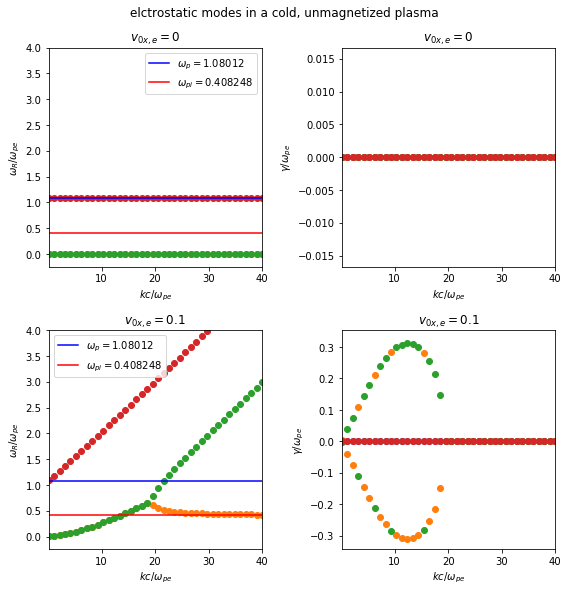

In [16]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
axs = axs.flatten()

wrmax = 4
ks0, ws0, dr_params0 = test(0, axs[0], axs[1], wrmax)
ks1, ws1, dr_params1 = test(0.1, axs[2], axs[3], wrmax)

for ax in [axs[0], axs[2]]:
    ax.axhline(dr_params1.wp_tot, c='b',
               label=r'$\omega_{{p}}={:g}$'.format(dr_params1.wp_tot))
    ax.axhline(dr_params1.wp[1], c='r',
               label=r'$\omega_{{pi}}={:g}$'.format(dr_params1.wp[1]))
    ax.legend()

fig.suptitle('elctrostatic modes in a cold, unmagnetized plasma',
             va='bottom',
             y=1)
fig.tight_layout()

## Another simpler DR solver for Bunemann instability
The two-fluid (electron-ion) Es1d Dr is very simple and can be performed in an easier way.

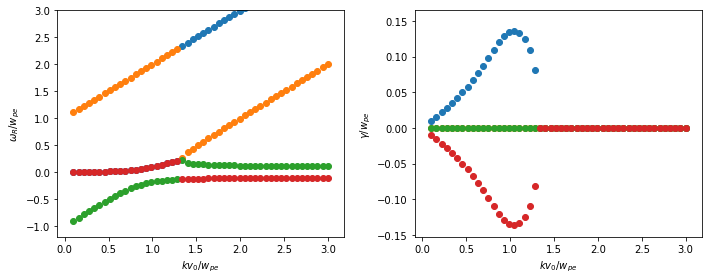

In [4]:
import numpy as np

def buneman_k2w_cold(k, m):
    """
    Args:
        k: k*v0/wpe
        m: mi/me

    Returns:
        ws: Complex frequency for the given k.
    """
    ws = np.roots((m, -2 * k * m, k**2 * m - (m + 1), 2 * k,  -k**2))
    return ws[np.argsort(ws.imag + 1j * ws.real)[::-1]]

mi_over_me = 100
ks = np.linspace(0.1, 3, 50)
ws = np.array([buneman_k2w_cold(k, mi_over_me) for k in ks])

plt.figure(figsize=(10, 4))
plt.subplot(121)
for i in range(4):
    plt.scatter(ks, ws[:, i].real)
plt.ylim(None, 3)
plt.xlabel(r'$kv_0/w_{pe}$')
plt.ylabel(r'$\omega_R/w_{pe}$')
plt.subplot(122)
for i in range(4):
    plt.scatter(ks, ws[:, i].imag)
plt.xlabel(r'$kv_0/w_{pe}$')
plt.ylabel(r'$\gamma/w_{pe}$')

plt.tight_layout()